In [ ]:
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

# print("Path to dataset files:", path)

# Path to dataset files: /Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1

/Users/kennychen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kennychen/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 775M/775M [01:22<00:00, 9.91MB/s] 

Extracting files...


Path to dataset files: /Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


First, I need to load in the dataset.
Here is the path to the data: /Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


In [87]:
import pathlib
from itertools import islice
import matplotlib.pyplot as plt
import os
from PIL import Image
from torchvision import datasets
import torch
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.nn as nn

imgdir_path = pathlib.Path('/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat')
for img_path in islice(imgdir_path.glob('*.jpg'), 10):
    print(img_path)


/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/9733.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/63.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/6400.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/823.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/4217.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/3578.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat/10321.jpg
/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages

Image 1 size: (365, 500)
Image 2 size: (500, 375)
Image 3 size: (320, 240)
Image 4 size: (500, 417)
Image 5 size: (500, 375)
Image 6 size: (341, 200)
Image 7 size: (484, 500)
Image 8 size: (500, 375)
Image 9 size: (306, 500)
Image 10 size: (448, 500)


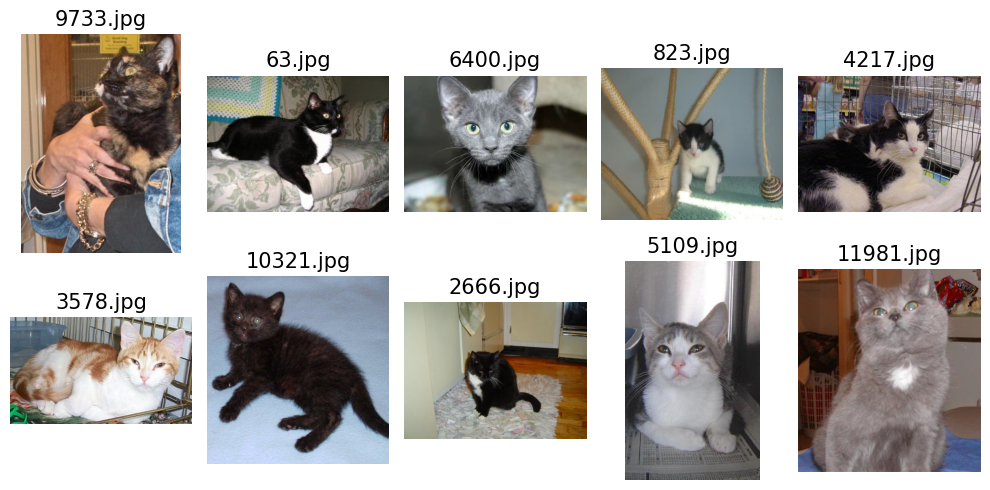

In [ ]:


fig = plt.figure(figsize=(10, 5))
for i, img_path in enumerate(islice(imgdir_path.glob('*.jpg'), 10)):
    img = Image.open(img_path)
    print(f"Image {i+1} size: {img.size}")
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(img)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.axis('off')
    ax.set_title(os.path.basename(img_path), size=15)
    
plt.tight_layout()
plt.show()

In [78]:

transform = v2.Compose([
    v2.Resize((224, 224)), # resize images to 224x224
    # v2.ToTensor(), # convert images to PyTorch tensors
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    # v2.Normalize(mean=[0.485, 0.456, 0.406],
    #                      std=[0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder('/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/', transform=transform)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)


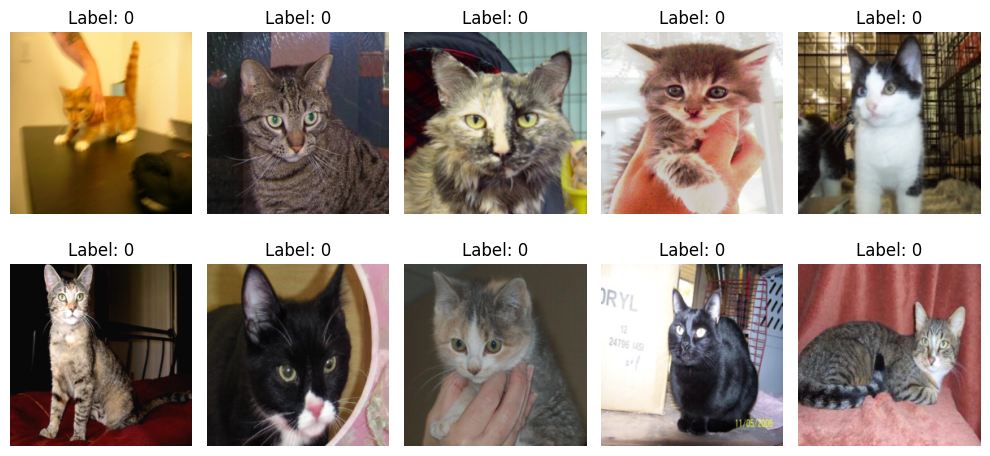

In [75]:
fig = plt.figure(figsize=(10, 5))
for i, (img, label) in enumerate(islice(train_ds, 10)):
    img = img.permute(1, 2, 0)  # CHW → HWC

    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {label}")

plt.tight_layout()
plt.show()

Next, I need to separate them into train and test

In [ ]:

full_ds = datasets.ImageFolder('/Users/kennychen/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/', transform=transform)

# 80% train, 20% test split
train_size = int(0.8 * len(train_ds))
test_size = len(train_ds) - train_size

train_ds, test_ds = random_split(train_ds, [train_size, test_size])
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=32, shuffle=False)

bath_size = 32 # batch size for training
torch.manual_seed(13) # for reproducibility

In [95]:
# Construyct the NN model
hidden_units = [32, 16]
image_size = train_ds[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    # all_layers.append(nn.Linear(input_size, hidden_units))
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 2)) # output layer for 2 classes  
model = nn.Sequential(*all_layers)
print(model)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=150528, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=2, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # weight_decay is L2 regularization
num_epochs = 5
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    model.train()
    for images, labels in train_dl:
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        accuracy_hist_train += (outputs.argmax(dim=1) == labels).float().mean().item()
    accuracy_hist_train /= len(train_dl)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {accuracy_hist_train:.4f}")

Epoch [1/10], Train Accuracy: 0.5431
Epoch [2/10], Train Accuracy: 0.5640
Epoch [3/10], Train Accuracy: 0.5733
Epoch [4/10], Train Accuracy: 0.4987
Epoch [5/10], Train Accuracy: 0.4990
Epoch [6/10], Train Accuracy: 0.5059
Epoch [7/10], Train Accuracy: 0.5003
Epoch [8/10], Train Accuracy: 0.5002
Epoch [9/10], Train Accuracy: 0.4901
Epoch [10/10], Train Accuracy: 0.4972


This simple MLP does not do too well. Let's look at a CNN

In [119]:
model = nn.Sequential() # Define an empty sequential model
model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)) # First convolutional layer
model.add_module('relu1', nn.ReLU()) # Activation function
model.add_module('pool1', nn.MaxPool2d(kernel_size=2, stride=2)) # First pooling layer
model.add_module('conv2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)) # Second convolutional layer
model.add_module('relu2', nn.ReLU()) # Activation function
model.add_module('pool2', nn.MaxPool2d(kernel_size=2, stride=2)) # Second pooling layer
model.add_module('flatten', nn.Flatten()) # Flatten layer
model.add_module('fc1', nn.Linear(32 * 56 * 56, 128)) # Fully connected layer
model.add_module('relu3', nn.ReLU()) # Activation function
model.add_module('fc2', nn.Linear(128, 2)) # Output layer for 2 classes 
loss_fn = nn.CrossEntropyLoss() # Define loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # weight_decay is L2 regularization


In [120]:
def train(model, num_epochs, train_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch
            y_batch = y_batch
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f}, loss: {loss_hist_train[epoch]:.4f}')
    return loss_hist_train, accuracy_hist_train,

torch.manual_seed(1)
num_epochs = 10
hist = train(model, num_epochs, train_dl)

Epoch 1 accuracy: 0.5888, loss: 0.6872
Epoch 2 accuracy: 0.6885, loss: 0.5857
Epoch 3 accuracy: 0.7395, loss: 0.5199
Epoch 4 accuracy: 0.7735, loss: 0.4678
Epoch 5 accuracy: 0.8107, loss: 0.4068
Epoch 6 accuracy: 0.8533, loss: 0.3311
Epoch 7 accuracy: 0.9069, loss: 0.2331
Epoch 8 accuracy: 0.9459, loss: 0.1458
Epoch 9 accuracy: 0.9726, loss: 0.0829
Epoch 10 accuracy: 0.9844, loss: 0.0534


In [122]:
from torchsummary import summary # to view model summary
summary(model, input_size=(3, 224, 224)) # summarize the model for input size (3, 224, 224)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
              ReLU-2         [-1, 16, 224, 224]               0
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
              ReLU-5         [-1, 32, 112, 112]               0
         MaxPool2d-6           [-1, 32, 56, 56]               0
           Flatten-7               [-1, 100352]               0
            Linear-8                  [-1, 128]      12,845,184
              ReLU-9                  [-1, 128]               0
           Linear-10                    [-1, 2]             258
Total params: 12,850,530
Trainable params: 12,850,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 21.44
Params size (MB): 49.02
Est

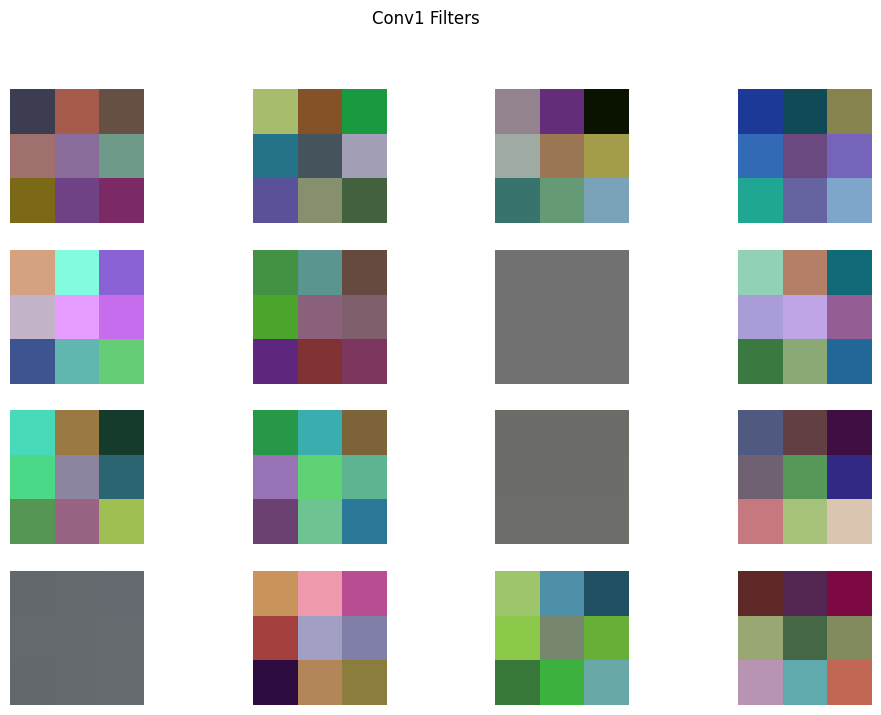

In [133]:
conv1 = model.conv1
import matplotlib.pyplot as plt
import torch

# Extract filters
filters = model.conv1.weight.data.clone()

# Normalize to [0, 1] for visualization
filters -= filters.min()
filters /= filters.max()

plt.figure(figsize=(12, 8))

for i in range(16):  # visualize each filter
    f = filters[i].permute(1, 2, 0)  # CHW → HWC
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(f)
    ax.axis("off")

plt.suptitle("Conv1 Filters")
plt.show()


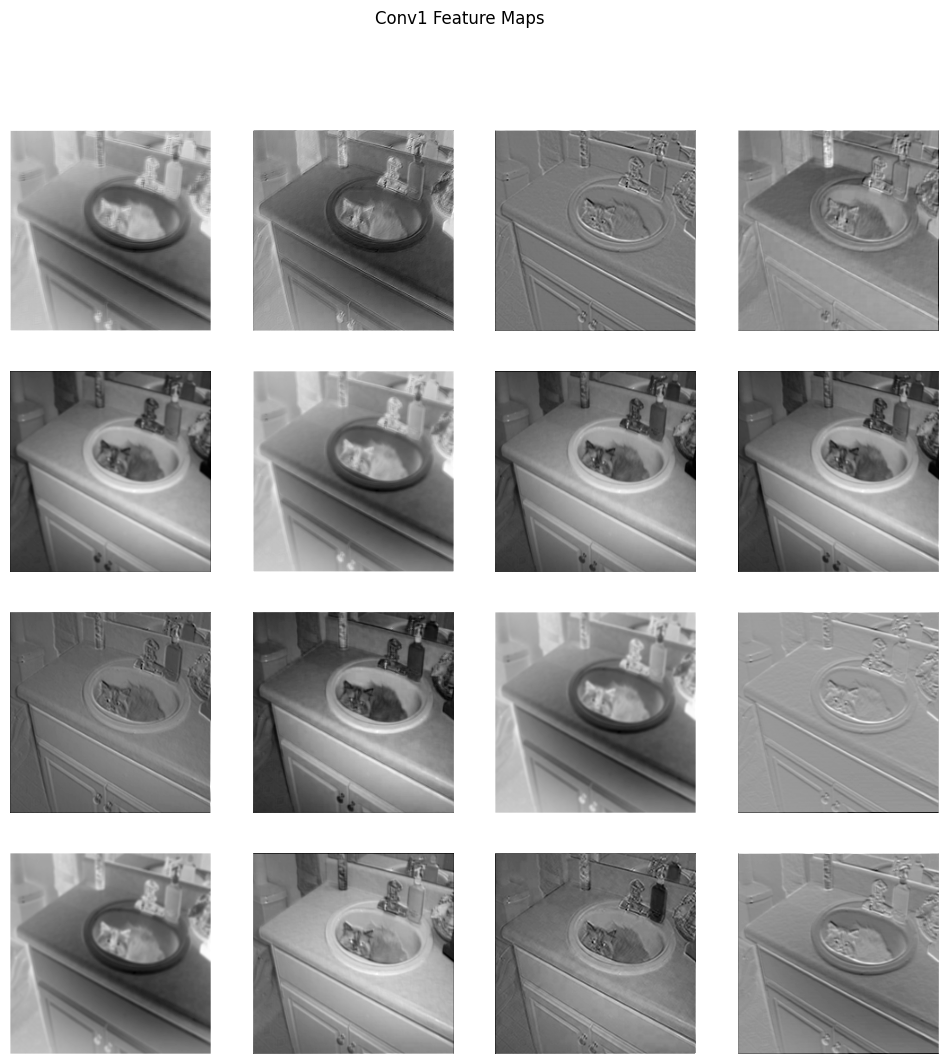

In [139]:
activations = {}

def hook_fn(module, input, output):
    activations['conv1'] = output

handle = model.conv1.register_forward_hook(hook_fn)

model.eval()
with torch.no_grad():
    _ = model(img)  # one image
acts = activations['conv1'][0]  # remove batch dim
plt.figure(figsize=(12, 12))

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(acts[i].cpu(), cmap="gray")
    ax.axis("off")

plt.suptitle("Conv1 Feature Maps")
plt.show()


In [ ]:
pred = model(test_ds.dataset)
is_correct = torch.argmax(pred, dim=1) == test_dl.dataset[0][1]
print(f'Predicted label: {torch.argmax(pred, dim=1).item()}, True label: {test_dl.dataset[0][1]}, Correct: {is_correct.item()}')


Predicted label: 0, True label: 1, Correct: False


In [131]:
model.eval()   # set to evaluation mode
test_accuracy = 0

with torch.no_grad():
    for images, labels in test_dl:
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        test_accuracy += (preds == labels).float().mean().item()

test_accuracy /= len(test_dl)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.6895


In [130]:
model.eval()
correct = 0

with torch.no_grad():
    for img, label in test_ds:
        img = img.unsqueeze(0)      # add batch dimension
        out = model(img)
        pred = out.argmax(dim=1).item()
        correct += (pred == label)

accuracy = correct / len(test_ds)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.6895
